<a href="https://colab.research.google.com/github/selinbilginay/DataScience/blob/main/Feature_Engineering_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=blue>Assignments for "Feature Engineering - Part 1"</font>

In this assignment, you will continue to study the `Students Performance` ([dataset](https://www.kaggle.com/spscientist/students-performance-in-exams/home)). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
title_font = {'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'color': 'darkblue','weight': 'bold','size': 10 }

In [3]:
exam_performance=pd.read_csv('/content/StudentsPerformance.csv')
exam_performance.info()
exam_performance.isnull().sum()*100/exam_performance.shape[0]
exam_performance.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

**(1)** Are the exam scores (math, reading, writing) normally distributed? If not, what can we do to have a normal distribution?

In [4]:
my_math=exam_performance
#my_math.drop([my_math==0].index,inplace=True)
my_math.drop(my_math[(my_math['math score']==0)].index,inplace=True)

In [5]:
exam_performance.dropna(inplace=True)
from scipy.stats import jarque_bera
from scipy.stats import normaltest

#pd.options.display.float_format='{:.5f}'.format
my_variables=['math score','reading score','writing score']
distribution_tests = pd.DataFrame(columns=['variable', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for variable in my_variables:
    jb_stats = jarque_bera(my_math[variable])
    norm_stats = normaltest(my_math[variable])
    distribution_tests = distribution_tests.append({"variable": variable,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
distribution_tests

,variable,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,math score,7.673084,0.021568,7.661033,0.021698
1,reading score,9.776353,0.007535,9.673377,0.007933
2,writing score,11.587461,0.003047,11.430536,0.003295


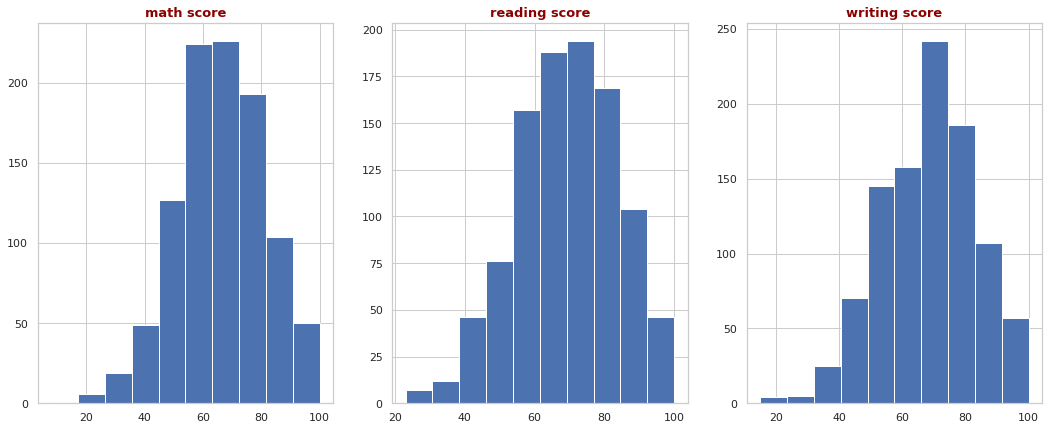

In [14]:
plt.figure(figsize=(18,7))
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.hist(exam_performance[my_variables[i]])
  plt.title(my_variables[i],fontdict=title_font)

 - There was a one 0 value in math scores so the test gave nan values. Then i desided to copy the csv file and without corrupting the original csv, i dropped the 0 value and then checked again.

 - So, the results show that these features ARE normally distributed. To have normally distributed features, we can use **square root**, **inverse** or **log of the variable** as we seen in data clearing.

**(2)** We want to keep the three exam results in one variable, as the target variable. To do this, define a new variable containing the average of the three exams. Test whether the average of this new variable is normally distributed. If it does not have a normal distribution, try to make it normally distributed by transforming and test the result of the transformation.

In [10]:
my_math['average grades']=(my_math['math score']+my_math['reading score']+my_math['writing score'])/3
distribution_tests = pd.DataFrame(columns=['variable', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])
jb_stats = jarque_bera(my_math['average grades'])
norm_stats = normaltest(my_math['average grades'])
distribution_tests = distribution_tests.append({"variable": 'average grades',
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
distribution_tests

,variable,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,average grades,10.345394,0.005669,10.127189,0.006323


Text(0.5, 1.0, 'Average Grades')

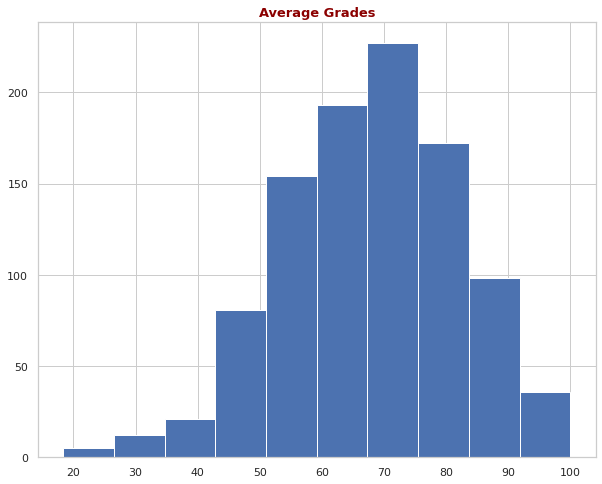

In [12]:
plt.figure(figsize=(10,8))
plt.hist(my_math['average grades'])
plt.title('Average Grades',fontdict=title_font)

- We can see that average grades ARE normally distributed. 

**(3)** Which variables seem to be related to the target variable we created in the previous question? If our goal was to explain the factors that determine the success of the exam, which variables should we keep in our data set?

In [16]:
genders = my_math['gender'].unique()
lunches = my_math['lunch'].unique()
parent_education = my_math['parental level of education'].unique()
tests = my_math['test preparation course'].unique()
origin = my_math['race/ethnicity'].unique()

In [17]:
comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
print("For the sake of comparison {} and genders".format('Average Grades',variable),end='')
for i in range(0, len(genders)):
  for j in range(i+1, len(genders)):
    ttest = stats.ttest_ind(my_math[my_math["gender"]==genders[i]]['average grades'], my_math[my_math["gender"]==genders[j]]['average grades'])
    group_1 = genders[i]
    group_2 = genders[j]
    statistic = ttest[0]
    p_value = ttest[1]
    comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
display(comparison)

For the sake of comparison Average Grades and genders

,group_1,group_2,statistic,p_value
0,female,male,4.336778,0.000016


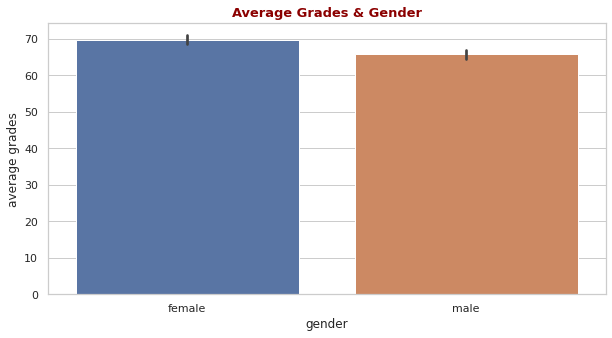

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(my_math['gender'],my_math['average grades'])
plt.title("Average Grades & Gender",fontdict=title_font)
plt.show()

In [23]:
comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
print("For the sake of comparison {} and lunch".format('Average Grades',variable),end='')
for i in range(0, len(lunches)):
  for j in range(i+1, len(lunches)):
    ttest = stats.ttest_ind(my_math[my_math["lunch"]==lunches[i]]['average grades'], my_math[my_math["lunch"]==lunches[j]]['average grades'])
    group_1 = lunches[i]
    group_2 = lunches[j]
    statistic = ttest[0]
    p_value = ttest[1]
    comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
display(comparison)

For the sake of comparison Average Grades and lunch

,group_1,group_2,statistic,p_value
0,standard,free/reduced,9.46778,1.998101e-20


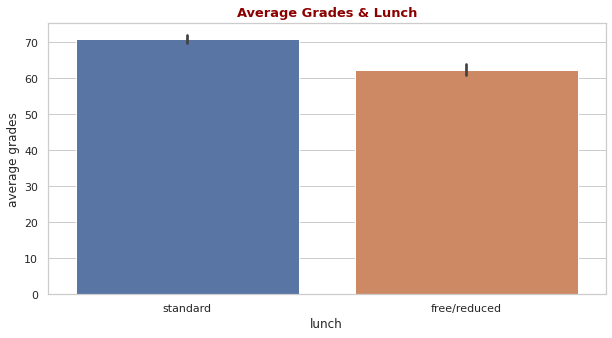

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(my_math['lunch'],my_math['average grades'])
plt.title("Average Grades & Lunch",fontdict=title_font)
plt.show()

In [21]:
comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
print("For the sake of comparison {} and Education Level Of Parents".format('Average Grades',variable),end='')
for i in range(0, len(parent_education)):
  for j in range(i+1, len(parent_education)):
    ttest = stats.ttest_ind(my_math[my_math['parental level of education']==parent_education[i]]['average grades'], my_math[my_math['parental level of education']==parent_education[j]]['average grades'])
    group_1 = parent_education[i]
    group_2 = parent_education[j]
    statistic = ttest[0]
    p_value = round(ttest[1],5)
    comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
display(comparison)

For the sake of comparison Average Grades and Education Level Of Parents

,group_1,group_2,statistic,p_value
0,bachelor's degree,some college,2.200747,0.02842
1,bachelor's degree,master's degree,-0.759477,0.44859
2,bachelor's degree,associate's degree,1.501301,0.13421
3,bachelor's degree,high school,5.539324,0.00000
4,bachelor's degree,some high school,3.847343,0.00015
5,some college,master's degree,-2.559652,0.01100
6,some college,associate's degree,-0.844579,0.39880
7,some college,high school,4.047081,0.00006
8,some college,some high school,2.171994,0.03044
9,master's degree,associate's degree,2.014635,0.04490


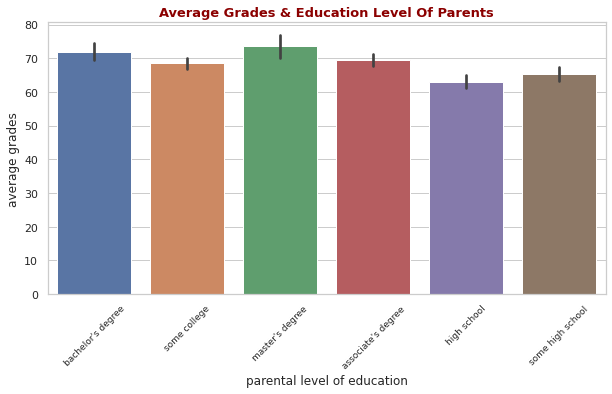

In [31]:
plt.figure(figsize=(10,5))
sns.barplot(my_math['parental level of education'],my_math['average grades'])
plt.title("Average Grades & Education Level Of Parents",fontdict=title_font)
plt.xticks(rotation = 45, fontsize = 9)
plt.show()

In [25]:
comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
print("For the sake of comparison {} and Test Preparation Course".format('Average Grades',variable),end='')
for i in range(0, len(tests)):
  for j in range(i+1, len(tests)):
    ttest = stats.ttest_ind(my_math[my_math['test preparation course']==tests[i]]['average grades'], my_math[my_math['test preparation course']==tests[j]]['average grades'])
    group_1 = tests[i]
    group_2 = tests[j]
    statistic = ttest[0]
    p_value = ttest[1]
    comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
display(comparison)

For the sake of comparison Average Grades and Test Preparation Course

,group_1,group_2,statistic,p_value
0,none,completed,-8.35792,2.125557e-16


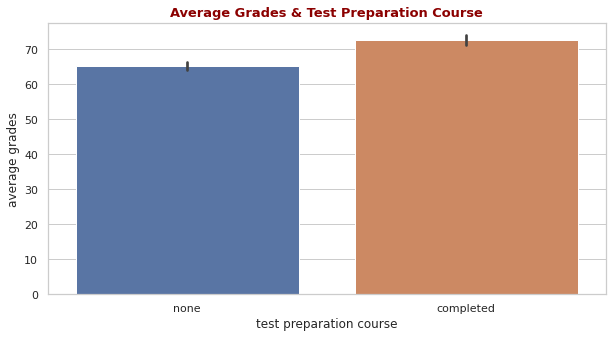

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(my_math['test preparation course'],my_math['average grades'])
plt.title("Average Grades & Test Preparation Course",fontdict=title_font)
plt.show()

In [26]:
comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
print("For the sake of comparison {} and Origin".format('Average Grades',variable),end='')
for i in range(0, len(origin)):
  for j in range(i+1, len(origin)):
    ttest = stats.ttest_ind(my_math[my_math['race/ethnicity']==origin[i]]['average grades'], my_math[my_math['race/ethnicity']==origin[j]]['average grades'])
    group_1 = origin[i]
    group_2 = origin[j]
    statistic = ttest[0]
    p_value = ttest[1]
    comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
display(comparison)

For the sake of comparison Average Grades and Origin

,group_1,group_2,statistic,p_value
0,group B,group C,-1.440595,0.150317
1,group B,group A,1.316504,0.189093
2,group B,group D,-2.803108,0.005280
3,group B,group E,-4.460378,0.000011
4,group C,group A,2.628075,0.008913
5,group C,group D,-1.669160,0.095627
6,group C,group E,-3.874988,0.000122
7,group A,group D,-3.717942,0.000234
8,group A,group E,-4.958668,0.000001
9,group D,group E,-2.487048,0.013288


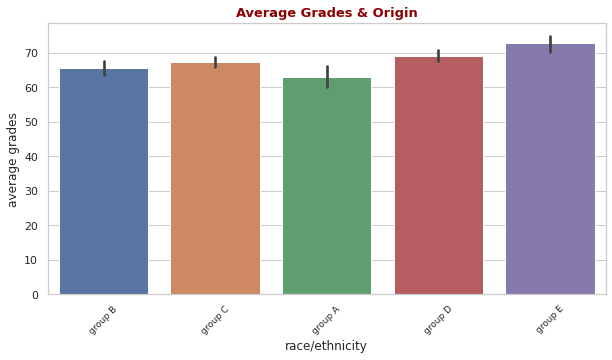

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(my_math['race/ethnicity'],my_math['average grades'])
plt.title("Average Grades & Origin",fontdict=title_font)
plt.xticks(rotation = 45, fontsize = 9)
plt.show()

 - When we look at the graphs and p-values, there seem that there is no such strong connections between our target variables and features but we can see that **education level of parents** seems to have more strong connection with our target variable so i would keep this feature in my dataset.

**(4)** Does the test preparation course have an impact on the target variable you created?

 - As it can be seen from the previous questions results, test preparation couse does not have the impact I expected it to have. So we can say that it mostly up to the child to have higher or lower grades. 